# <center> Topic 2. Visual data analysis
## <center>Practice. Analyzing "Titanic" passengers

**Fill in the missing code ("You code here").**

**<a href="https://www.kaggle.com/c/titanic">Competition</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Read data**

In [45]:
train_df = pd.read_csv("titanic_train.csv", index_col="PassengerId")

In [46]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [47]:
train_df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Let's drop`Cabin`, and then – all rows with missing values.**

In [49]:
train_df = train_df.drop("Cabin", axis=1).dropna()

In [50]:
train_df.shape

(712, 10)

**1. Build a picture to visualize all scatter plots for each pair of features `Age`, `Fare`, `SibSp`, `Parch` and `Survived`. ( `scatter_matrix ` from Pandas or `pairplot` from Seaborn)**

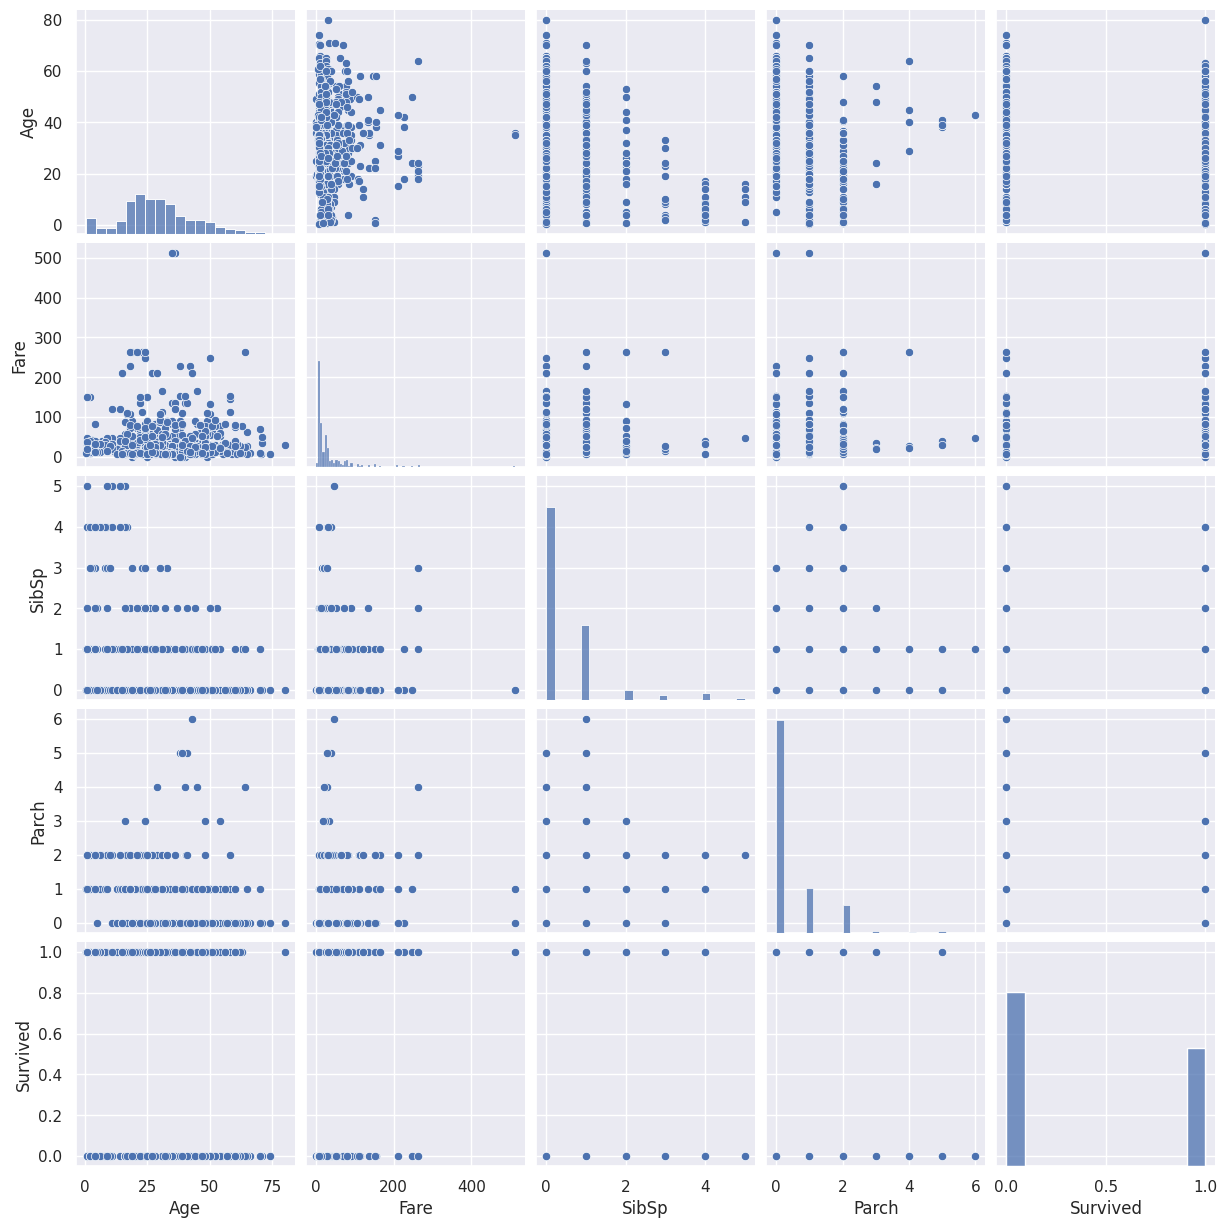

In [51]:
features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']

sns.pairplot(train_df[features])

plt.show()

**2. How does ticket price (`Fare`) depend on `Pclass`? Build a boxplot.**

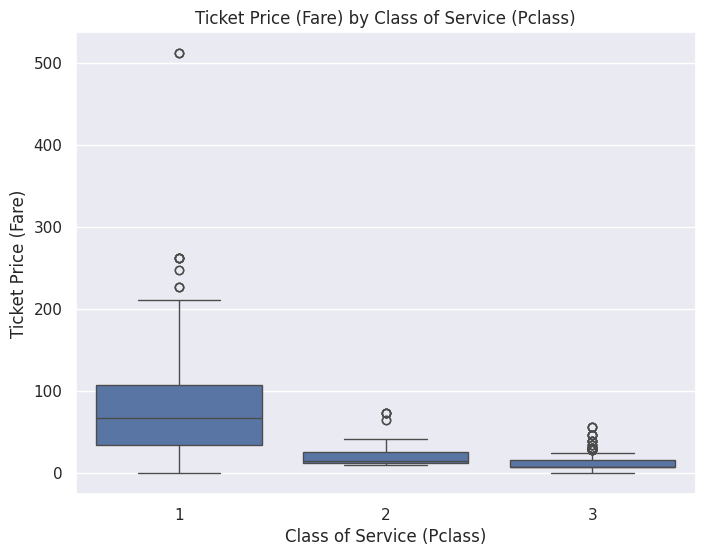

In [52]:

plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Fare', data=train_df)

plt.title('Ticket Price (Fare) by Class of Service (Pclass)')
plt.xlabel('Class of Service (Pclass)')
plt.ylabel('Ticket Price (Fare)')

plt.show()

**3. Let's build the same plot but restricting values of `Fare` to be less than 95% quantile of the initial vector (to drop outliers that make the plot less clear).**

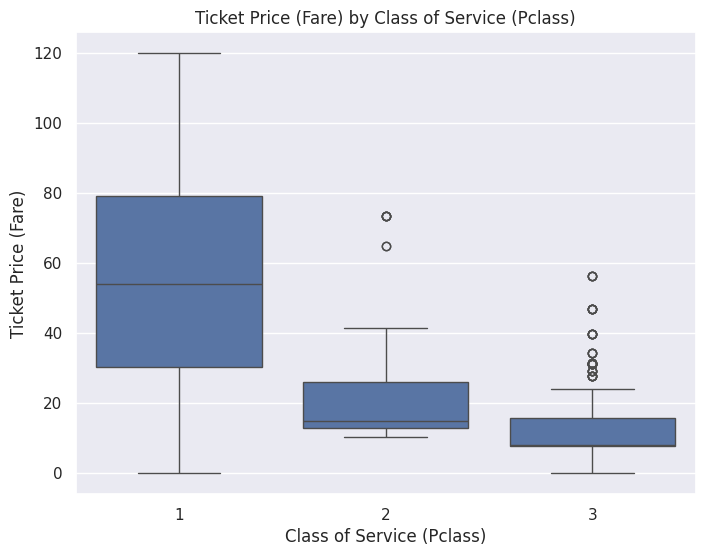

In [53]:
quantile_95 = np.percentile(train_df['Fare'], 95)

df_filtered = train_df[train_df['Fare'] <= quantile_95]

plt.figure(figsize=(8,6))
sns.boxplot(x='Pclass', y='Fare', data=df_filtered)

plt.title('Ticket Price (Fare) by Class of Service (Pclass)')
plt.xlabel('Class of Service (Pclass)')
plt.ylabel('Ticket Price (Fare)')

plt.show()

**4. How is the percentage of surviving passengers dependent on passengers' gender? Depict it with `Seaborn.countplot` using the `hue` argument.**

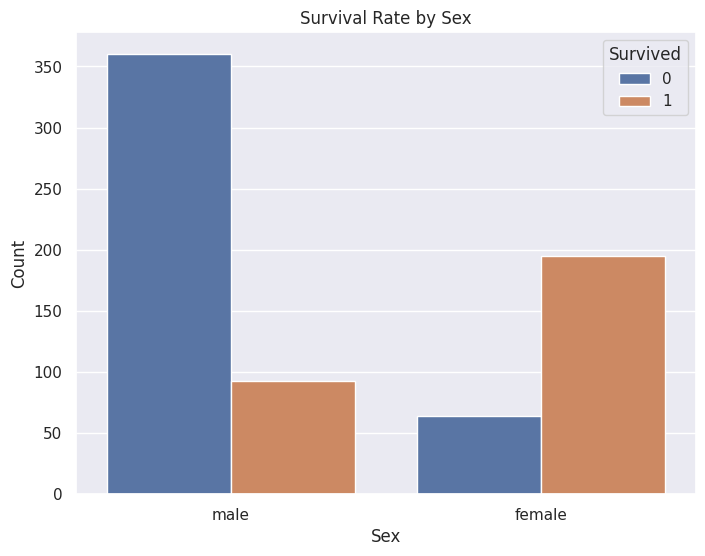

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sex', hue='Survived', data=train_df)

plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

**5. How does the distribution of ticket prices differ for those who survived and those who didn't. Depict it with `Seaborn.boxplot`**

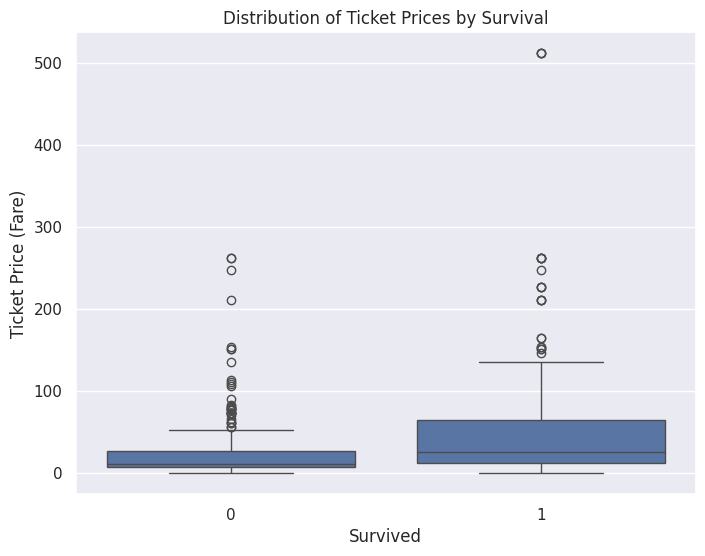

In [55]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=train_df)

plt.title('Distribution of Ticket Prices by Survival')
plt.xlabel('Survived')
plt.ylabel('Ticket Price (Fare)')

plt.show()

**6. How does survival depend on passengers' age?  Verify (graphically) an assumption that youngsters (< 30 y.o.) survived more frequently than old people (> 55 y.o.).**

/tmp/ipykernel_138765/1872392233.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = train_df.groupby('AgeGroup')['Survived'].mean().reset_index()


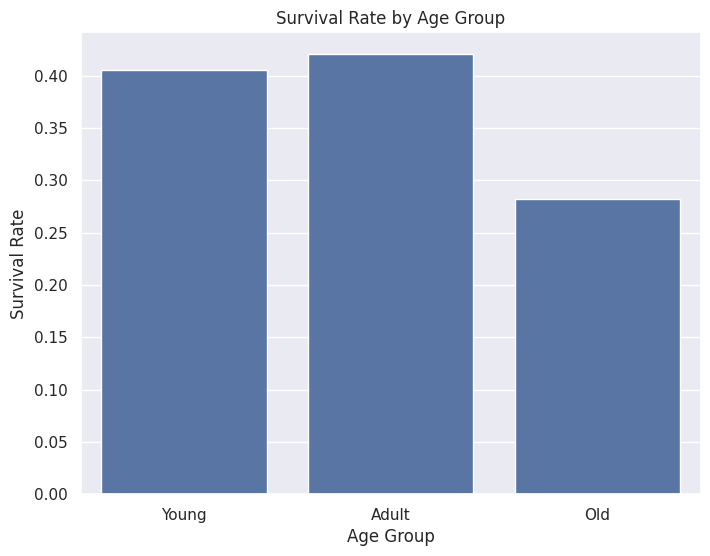

In [56]:

train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 30, 55, 100], labels=['Young', 'Adult', 'Old'])

survival_rates = train_df.groupby('AgeGroup')['Survived'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='AgeGroup', y='Survived', data=survival_rates)

plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')

plt.show()